# SuPy UHI testing February 4 2021

In [2]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night 
from dict_legend import *
from supy_plot import supy_plot, zeroline
get_ipython().run_line_magic('matplotlib', 'inline')
# get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
sp.show_version()

SuPy versions
-------------
supy: 2021.1.12 
supy_driver: 2020b13

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 51.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.1
IPython      

In [3]:
path_runcontrol_s = Path('SuPy/src/supy/sample_run')/ 'RunControl.nml'
df_state_init_s = sp.init_supy(path_runcontrol_s)
grid_s = df_state_init_s.index[0]
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid_s)

# Wisley Data
path_runcontrol_w = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley.nml'
df_state_init_w = sp.init_supy(path_runcontrol_w)
grid_w = df_state_init_w.index[0]
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid_w)

# Wisley Data
path_runcontrol_wu = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley_urban.nml'
df_state_init_wu = sp.init_supy(path_runcontrol_wu)
grid_wu = df_state_init_wu.index[0]
df_forcing_wu = sp.load_forcing_grid(path_runcontrol_wu, grid_wu)

2021-02-04 14:57:57,834 - SuPy - INFO - All cache cleared.
2021-02-04 14:57:59,174 - SuPy - INFO - All cache cleared.
2021-02-04 14:58:01,575 - SuPy - INFO - All cache cleared.
2021-02-04 14:58:02,942 - SuPy - INFO - All cache cleared.
2021-02-04 14:58:05,205 - SuPy - INFO - All cache cleared.
2021-02-04 14:58:06,579 - SuPy - INFO - All cache cleared.


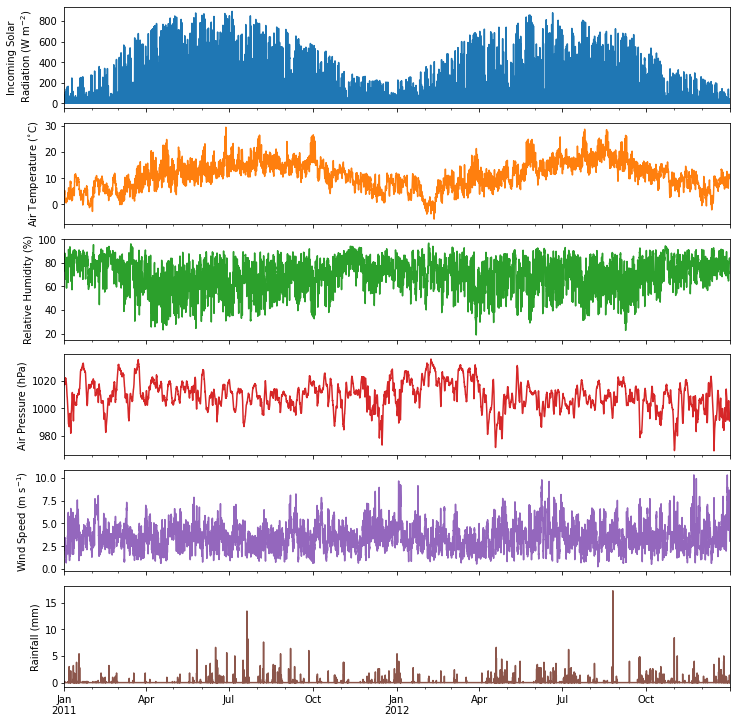

In [4]:
# %% Sample Data Metological Conditions

df_plot_forcing_x = df_forcing_s.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()
    
axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

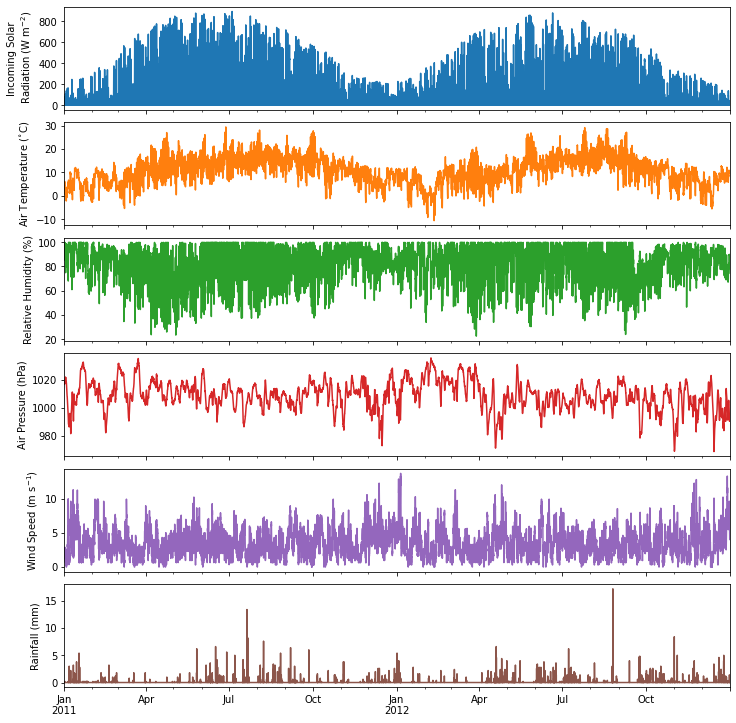

In [5]:
# %% Wisley Metological Conditions

df_plot_forcing_x = df_forcing_w.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [6]:
# %% Investigate Metreological conditions for London and Wisley
df_forcing_m = pd.concat([df_forcing_s, df_forcing_w],axis=1,join='inner',keys=['fKC','fWS']).swaplevel(0,1,axis=1)


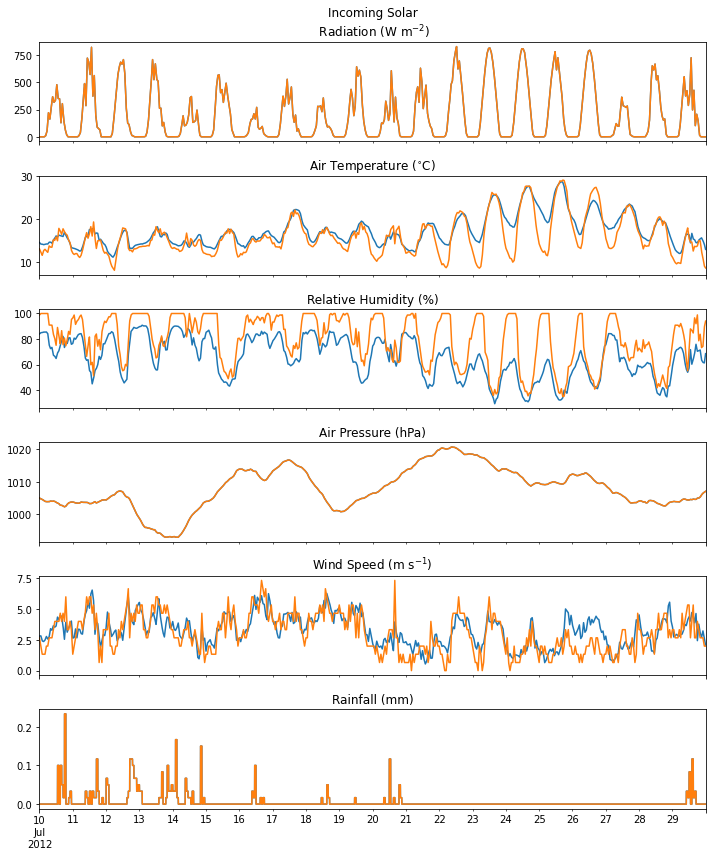

In [7]:
fsize=(10,12)
fig, axes = plt.subplots(6, 1, sharex=True)
s = '2012 07 10'
e = '2012 07 29'
a = df_forcing_m.loc[s : e ,'kdown'].plot(ax=axes[0],figsize=fsize,title= 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)')
b = df_forcing_m.loc[s : e ,'Tair'].plot(ax=axes[1],figsize=fsize,title='Air Temperature ($^{\circ}}$C)')
c = df_forcing_m.loc[s : e ,'RH'].plot(ax=axes[2],figsize=fsize,title='Relative Humidity (%)')
d = df_forcing_m.loc[s : e ,'pres'].plot(ax=axes[3],figsize=fsize,title='Air Pressure (hPa)')
e1= df_forcing_m.loc[s : e ,'U'].plot(ax=axes[4],figsize=fsize,title='Wind Speed (m $\mathrm{s^{-1}}$)')
f = df_forcing_m.loc[s : e ,'rain'].plot(ax=axes[5],figsize=fsize,title='Rainfall (mm)')
for var in [a,b,c,d,e1,f]:
    figsize=fsize
    #night(var,df_forcing_s,s,e)
    var.get_legend().remove()
fig.tight_layout()

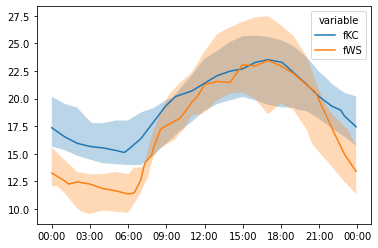

In [8]:
# %% June Tair Sample Data
s = '2012 07 21'
e = '2012 07 29'
ax = sp.util.plot_day_clm(df_forcing_m.loc[s:e,'Tair'])

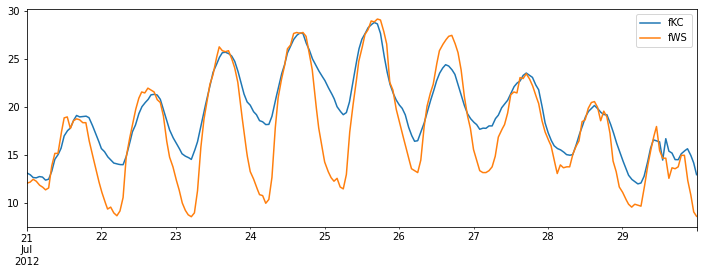

In [9]:
# %% June Tair Wisley Data 
ax_output = df_forcing_m.loc[s:e,'Tair'].plot(figsize=(12,4))

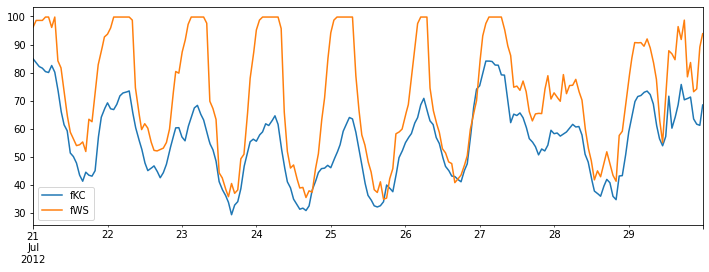

In [10]:
# %%  RH Selected days comparison
ax_output = df_forcing_m.loc[s:e,'RH'].plot(figsize=(12,4))

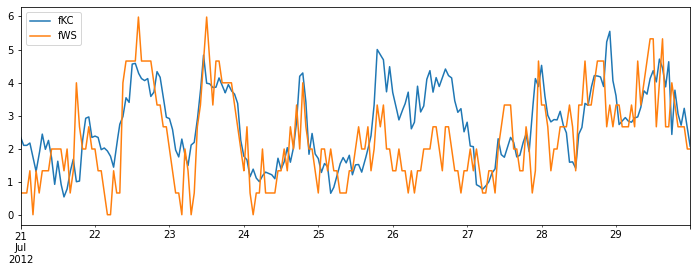

In [11]:
# %%  U Selected days comparison
ax_output = df_forcing_m.loc[s:e,'U'].plot(figsize=(12,4))

# Scenarios used 

## Run SuPy

In [12]:

# fKC_sKC
df_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)

# fWS_sWS
df_output_w, df_state_final_w = sp.run_supy(df_forcing_w, df_state_init_w)
 
# fWS_sKC
df_output_wu, df_state_final_wu = sp.run_supy(df_forcing_wu, df_state_init_wu)

df_forcing_merge_x=pd.concat([df_forcing_s, df_forcing_wu,df_forcing_w],axis=1,join='inner',keys=['fKC_sKC','fWS_sKC','fWS_sWS']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_state_merge_x=pd.concat([df_state_init_s, df_state_init_wu,df_state_init_w],axis=1,join='inner',keys=['fKC_sKC','fWS_sKC','fWS_sWS']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_output_merge_x=df_output_merge_x=pd.concat([df_output_s, df_output_wu,df_output_w],axis=1,join='inner',keys=['fKC_sKC','fWS_sKC','fWS_sWS']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid_s]

df_merge_x=df_output_merge_x.SUEWS

# add available energy, AE
df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

2021-02-04 14:58:41,998 - SuPy - INFO - ====================
2021-02-04 14:58:41,999 - SuPy - INFO - Simulation period:
2021-02-04 14:58:42,000 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-02-04 14:58:42,001 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-02-04 14:58:42,001 - SuPy - INFO - 
2021-02-04 14:58:42,002 - SuPy - INFO - No. of grids: 1
2021-02-04 14:58:42,003 - SuPy - INFO - SuPy is running in serial mode
2021-02-04 14:59:34,024 - SuPy - INFO - Execution time: 52.0 s
2021-02-04 14:59:34,025 - SuPy - INFO - ====================

2021-02-04 14:59:34,025 - SuPy - INFO - ====================
2021-02-04 14:59:34,026 - SuPy - INFO - Simulation period:
2021-02-04 14:59:34,027 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-02-04 14:59:34,028 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-02-04 14:59:34,028 - SuPy - INFO - 
2021-02-04 14:59:34,029 - SuPy - INFO - No. of grids: 1
2021-02-04 14:59:34,030 - SuPy - INFO - SuPy is running in serial mode
2021-02-04 15:01:43,161 - S

In [19]:
# Start and end date for comparison
s = '2012 07 22'
e = '2012 07 29'

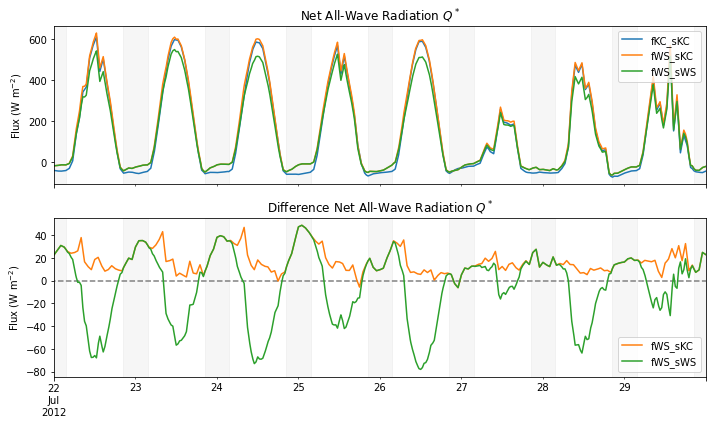

In [14]:
# %% Net All Wave Radiation
var = 'QN'
supy_plot(var, df_merge_x,s,e)

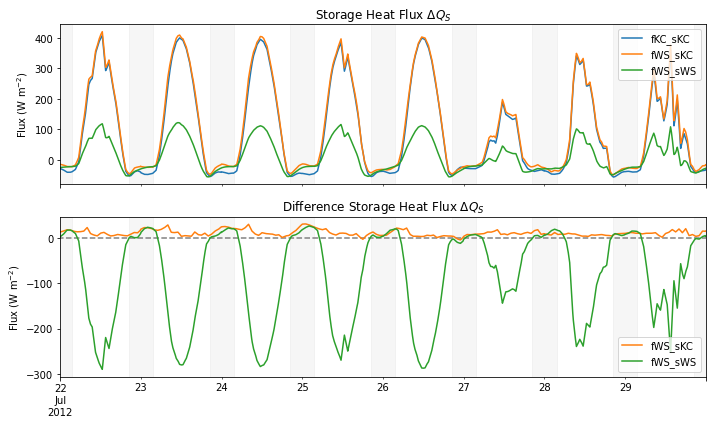

In [15]:
# %% Storage Heat Flux
var = 'QS'
supy_plot(var, df_merge_x,s,e)

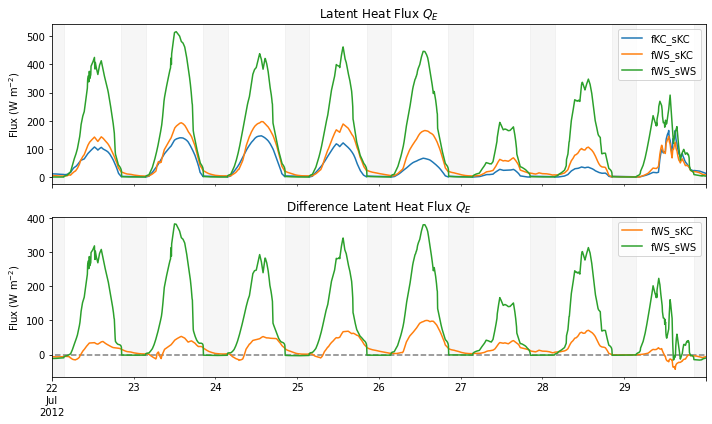

In [16]:
# Latent Heat Flux
var = 'QE'
supy_plot(var, df_merge_x,s,e)

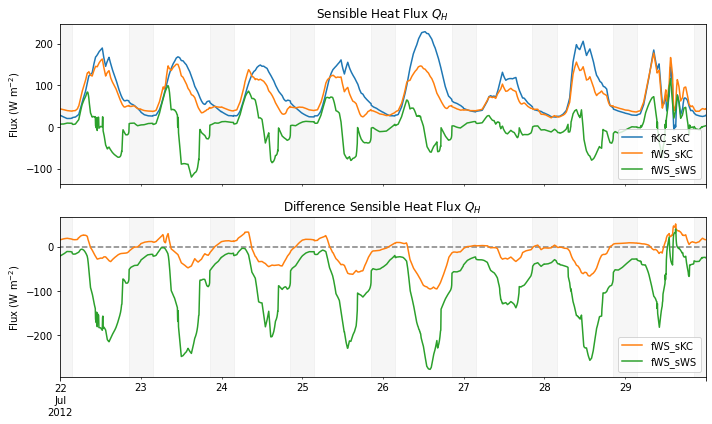

In [17]:
# Sensible Heat Flux
var = 'QH'
supy_plot(var, df_merge_x,s,e)

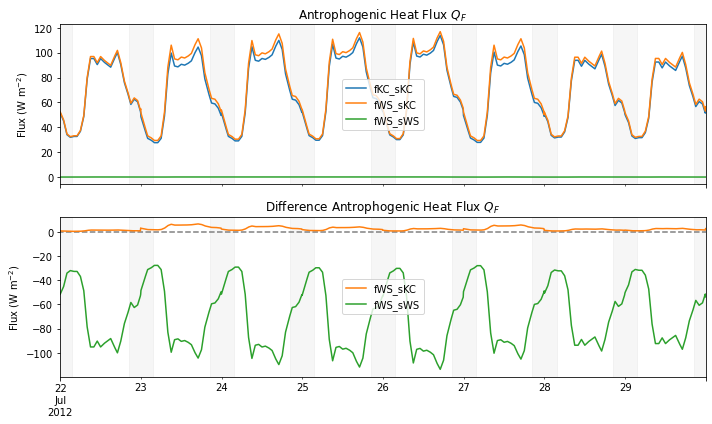

In [18]:
# %%% Anthropogenic Heat flux
supy_plot('QF', df_merge_x,s,e)

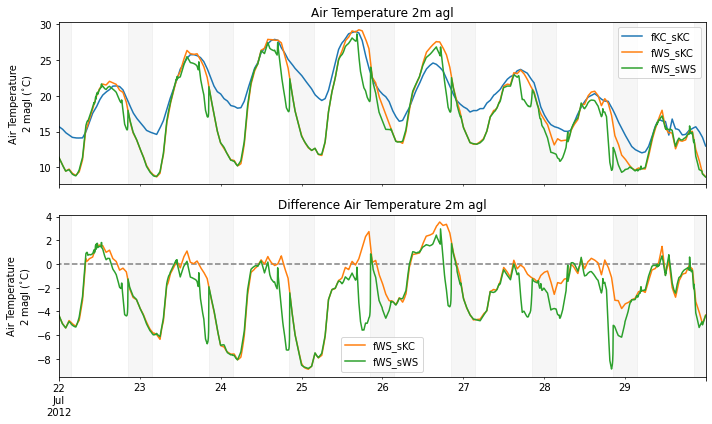

In [20]:
supy_plot('T2', df_merge_x,s,e)

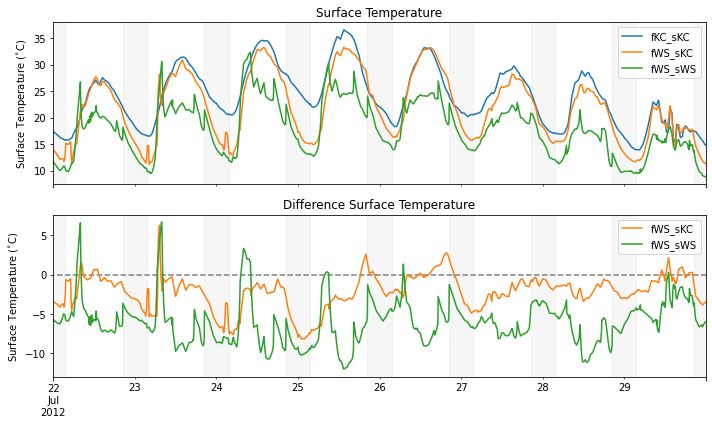

In [21]:
supy_plot('Ts', df_merge_x,s,e)

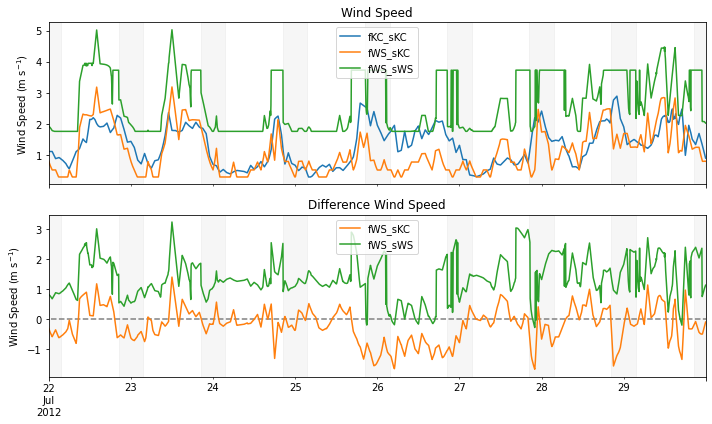

In [22]:
# %% Wind Speed 10m
supy_plot('U10', df_merge_x,s,e)

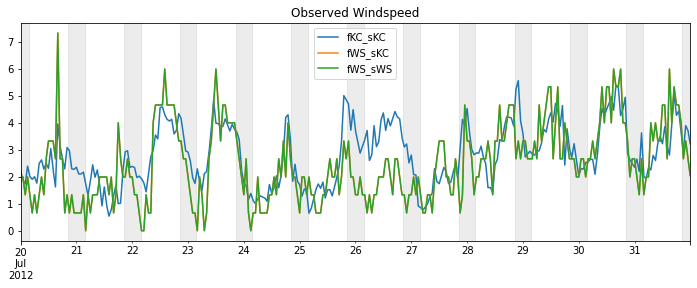

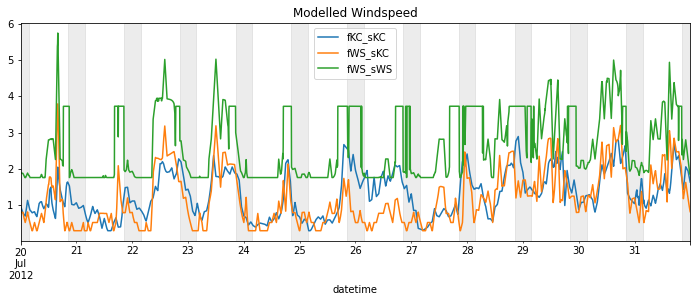

In [46]:
# %%  U Selected days comparison
ax_output = df_forcing_merge_x.loc[s:e,'U'].plot(figsize=(12,4),title ='Observed Windspeed')
night(ax_output,df_merge_x,s,e,s_alpha=0.15)
ax_output = df_merge_x.loc[s:e,'U10'].plot(figsize=(12,4), title = 'Modelled Windspeed')
night(ax_output,df_merge_x,s,e,s_alpha=0.15)



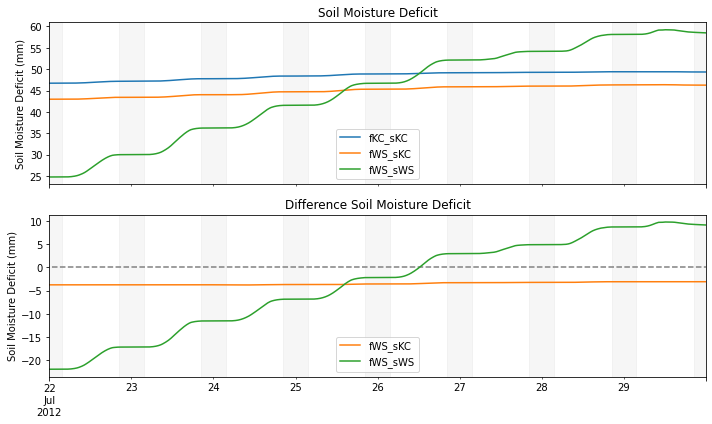

In [24]:
# %% Soil Moisture Deficit
supy_plot('SMD', df_merge_x,s,e)

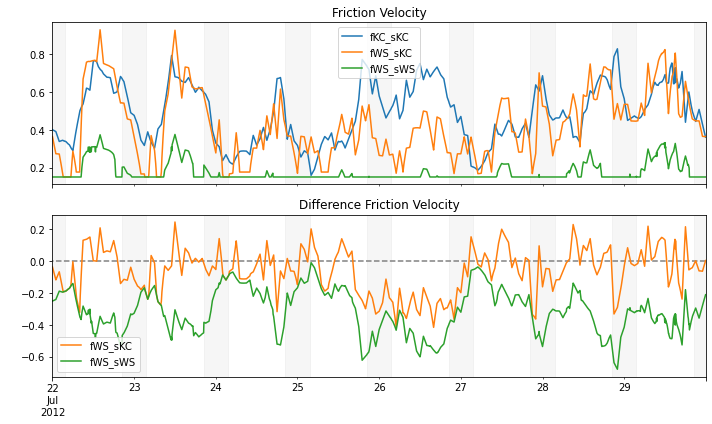

In [25]:
supy_plot('UStar', df_merge_x,s,e)

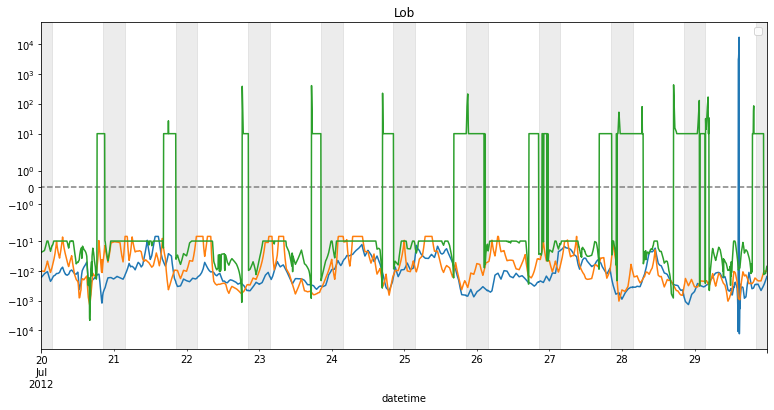

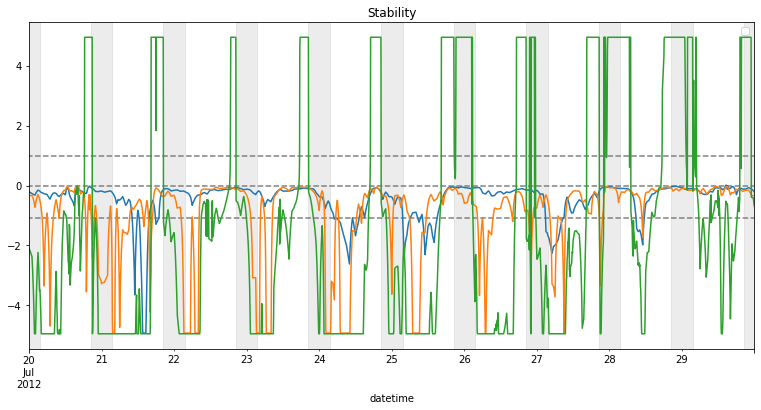

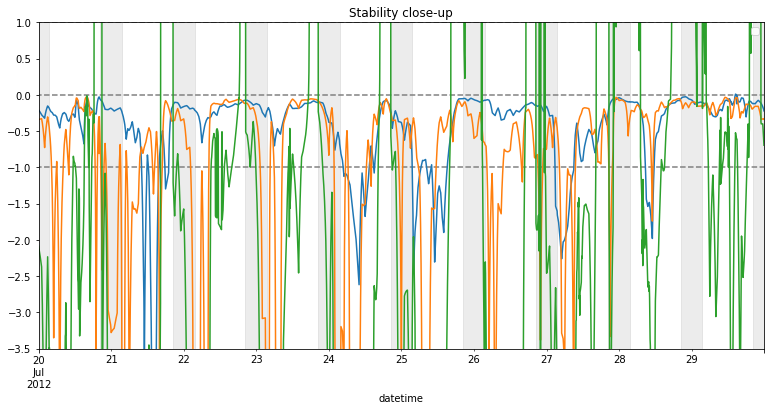

In [78]:
s = '2012 07 20'
e = '2012 07 29'
from supy_plot import zeroline
ax = df_merge_x.loc[s:e,'Lob'].plot(figsize=(13,6),title='Lob')
ax.set_yscale('symlog')
#ax.set_ylim([-3.5,0.5])
night(ax,df_merge_x,s,e,s_alpha=0.15)
zeroline(s,e)
plt.legend('')

ax = pd.DataFrame((49.1-df_merge_x['zdm'])/df_merge_x['Lob']).loc[s:e].plot(figsize=(13,6),title='Stability')
night(ax,df_merge_x,s,e,s_alpha=0.15)
plt.legend('')
for i in (1, 0, -1.1):
    zeroline(s,e,i)


ax = pd.DataFrame((49.1-df_merge_x['zdm'])/df_merge_x['Lob']).loc[s:e].plot(figsize=(13,6),title='Stability close-up')
ax.set_ylim([-3.5,1])
night(ax,df_merge_x,s,e,s_alpha=0.15)
plt.legend('')
for i in (1, 0, -1):
    zeroline(s,e,i)


## large QE at Wisley: why?

In [28]:
df_state_merge_x[['z0m_in', 'zdm_in']]

var      z0m_in                  zdm_in                
        fKC_sKC fWS_sKC fWS_sWS fKC_sKC fWS_sKC fWS_sWS
ind_dim       0       0       0       0       0       0
grid                                                   
1           1.9     1.9    0.03    14.2    14.2     0.1

In [29]:
df_sfr=df_state_merge_x.sfr.stack()
df_sfr.index=['Bldgs','Paved','DecTr','EveTr','Grass','BSoil','Water']
df_sfr

fKC_sKC  fWS_sKC  fWS_sWS
Bldgs     0.43     0.43    0.001
Paved     0.38     0.38    0.002
DecTr     0.00     0.00    0.010
EveTr     0.02     0.02    0.050
Grass     0.03     0.03    0.927
BSoil     0.00     0.00    0.010
Water     0.14     0.14    0.000

In [30]:
print(df_sfr.to_markdown())

|       |   fKC_sKC |   fWS_sKC |   fWS_sWS |
|:------|----------:|----------:|----------:|
| Bldgs |      0.43 |      0.43 |     0.001 |
| Paved |      0.38 |      0.38 |     0.002 |
| DecTr |      0    |      0    |     0.01  |
| EveTr |      0.02 |      0.02 |     0.05  |
| Grass |      0.03 |      0.03 |     0.927 |
| BSoil |      0    |      0    |     0.01  |
| Water |      0.14 |      0.14 |     0     |


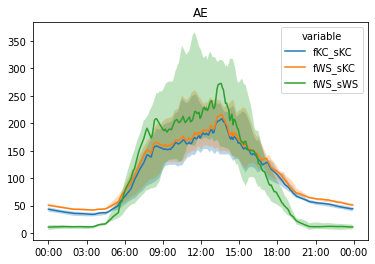

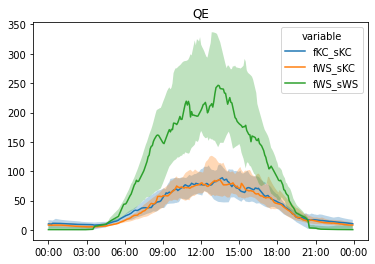

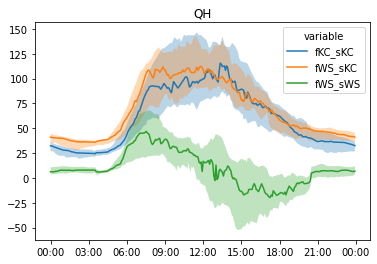

In [36]:

for var in ['AE','QE','QH']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc['2012 7',var])
    _=ax.set_title(var)

## T2 issue

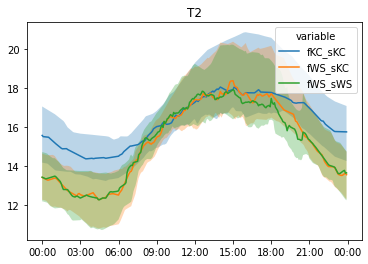

In [32]:
fig,ax=sp.util.plot_day_clm(df_merge_x.T2.loc['2012 7'])
_=ax.set_title('T2')

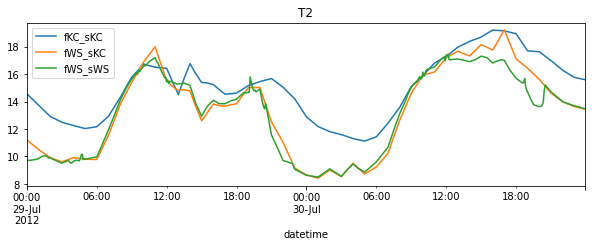

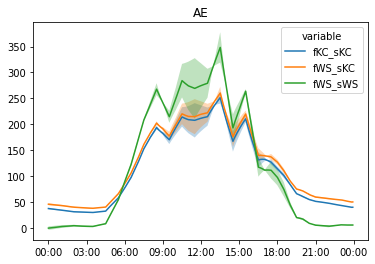

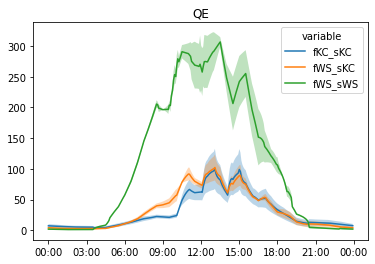

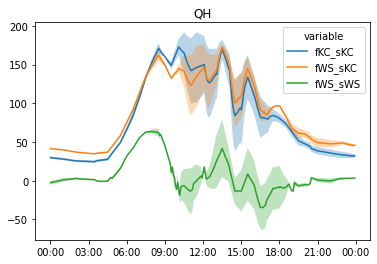

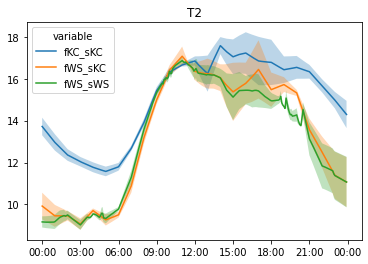

In [33]:
df_merge_x.loc[s:e,'T2'].plot(figsize=[10,3],title='T2')

for var in ['AE','QE','QH','T2']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc[s:e,var])
    _=ax.set_title(var)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

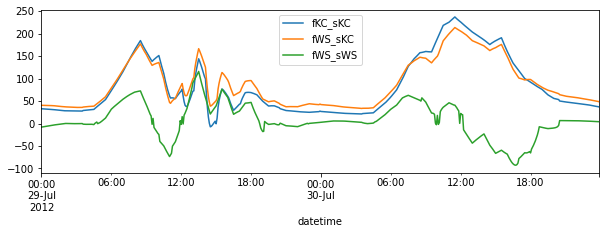

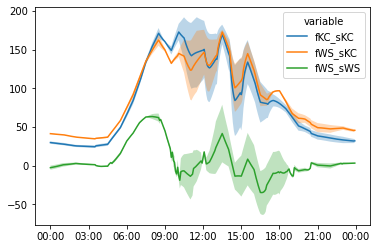

In [34]:
df_merge_x.loc[s:e,'QH'].plot(figsize=[10,3])
sp.util.plot_day_clm(df_merge_x.loc[s:e,'QH'])

In [35]:
df_x=df_merge_x.loc[s:e,['QH','T2']].stack(0).iloc[:,1:].unstack(1).swaplevel(axis=1).sort_index(axis=1)
idx=df_x.loc['2012 7 23','QH'].query('fWS_sWS>0').index
df_x.loc['2012 7 23','T2'].loc[idx].plot()

KeyError: '2012 7 23'

<AxesSubplot:title={'center':'dif_T2'}, xlabel='flag_QH'>

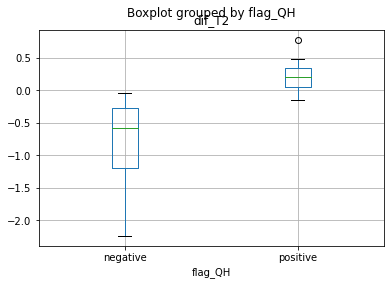

In [57]:
df_x=df_merge_x.loc[s:e,'QH']
flag_QH=df_x.fWS_sWS.where(df_x.fWS_sWS>0,False).astype(bool)
df_x=df_merge_x.loc[s:e,'T2'].diff(axis=1).assign(flag_QH=flag_QH.replace({True:'positive',False:'negative'}))
df_x.melt(id_vars='flag_QH',value_vars=['fWS_sWS'],value_name=r'dif_T2').boxplot(column=r'dif_T2',by='flag_QH')

<AxesSubplot:>

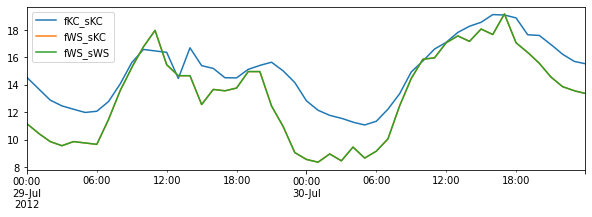

In [58]:
df_forcing_merge_x.loc[s:e,'Tair'].plot(figsize=[10,3])

In [59]:
df_T_RSL=df_output_merge_x.RSL.filter(like='T_').loc[s:e].stack().drop_prefix('T_').sort_index(axis=1,key=pd.to_numeric).unstack()


AttributeError: 'DataFrame' object has no attribute 'drop_prefix'

In [60]:
df_T_RSL.loc[:,'1'].plot(figsize=[10,3])
df_T_RSL.loc[:,'15'].plot(figsize=[10,3])
df_T_RSL.loc[:,'30'].plot(figsize=[10,3])

NameError: name 'df_T_RSL' is not defined

In [30]:
df_output_merge_x.RSL.stack().columns.to_list();

In [61]:
df_output_merge_x.RSL.flag_RSL

fKC_sKC  fWS_sKC  fWS_sWS
datetime                                      
2011-01-01 00:05:00      1.0      1.0      0.0
2011-01-01 00:10:00      1.0      1.0      0.0
2011-01-01 00:15:00      1.0      1.0      0.0
2011-01-01 00:20:00      1.0      1.0      0.0
2011-01-01 00:25:00      1.0      1.0      0.0
...                      ...      ...      ...
2012-12-31 23:40:00      1.0      1.0      0.0
2012-12-31 23:45:00      1.0      1.0      0.0
2012-12-31 23:50:00      1.0      1.0      0.0
2012-12-31 23:55:00      1.0      1.0      0.0
2013-01-01 00:00:00      1.0      1.0      0.0

[210528 rows x 3 columns]

In [10]:
sp.save_supy(df_output_s, df_state_final_s, path_runcontrol=path_runcontrol_s)
sp.save_supy(df_output_w, df_state_final_w, path_runcontrol=path_runcontrol_w)
sp.save_supy(df_output_wu, df_state_final_wu, path_runcontrol=path_runcontrol_wu)

[WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2011_DailyState.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2012_DailyState.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2011_RSL_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2012_RSL_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2011_SOLWEIG_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2012_SOLWEIG_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2011_SUEWS_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2012_SUEWS_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2011_snow_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/Wu1_2012_snow_60.txt'),
 WindowsPath('C:/Script/SuPy/src/supy/sample_run/Output/InitialConditionsWu1_2013_EndofRun.nml')]